In [38]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, List, Dict, Any

In [39]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    number3 : int
    number4 : int
    result : int
    result2 : int
    operation1 : str
    operation2 : str

In [40]:
def adder(state: AgentState) -> AgentState:
    """This node add 2 numbers"""

    state["result"] = state["number1"] + state["number2"]
    return state

def subbtractor(state: AgentState) -> AgentState:
    """This node subt 2 numbers"""

    state["result"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> str:
    """This node decide which node to go next"""

    if state["operation1"] == "+":
        return "adder"
    elif state["operation1"] == "-":
        return "subbtractor"
    else:
        raise ValueError("Unknown operation1")
    

    

In [41]:
def adder2(state: AgentState) -> AgentState:
    """This node add 2 numbers"""

    state["result2"] = state["number3"] + state["number4"]
    return state

def subbtractor2(state: AgentState) -> AgentState:
    """This node subt 2 numbers"""

    state["result2"] = state["number3"] - state["number4"]
    return state

def decide_next_node2(state: AgentState) -> str:
    """This node decide which node to go next"""

    if state["operation2"] == "+":
        return "adde2r"
    elif state["operation2"] == "-":
        return "subbtractor2"
    else:
        raise ValueError("Unknown operation2")

In [42]:
graph = StateGraph(AgentState)

graph.add_node('add', adder)
graph.add_node('sub', subbtractor)
graph.add_node('decide', lambda state:state) #pass through funstion, as we dont assign anything we just compare the operation

graph.add_edge(START, 'decide')

graph.add_conditional_edges(
    'decide',
    decide_next_node,
    {
        'adder': 'add',
        'subbtractor': 'sub'
    }

) #Add conditional edges based on the operation



graph.add_node('add2', adder2)
graph.add_node('sub2', subbtractor2)
graph.add_node('decide2', lambda state:state) #pass through funstion, as we dont assign anything we just compare the operation

graph.add_edge('add', 'decide2')
graph.add_edge('sub', 'decide2')


graph.add_conditional_edges(
    'decide2',
    decide_next_node2,
    {
        'adder2': 'add2',
        'subbtractor2': 'sub2'
    }

) #Add conditional edges based on the operation


graph.add_edge('add2', END)
graph.add_edge('sub2', END)
app = graph.compile()

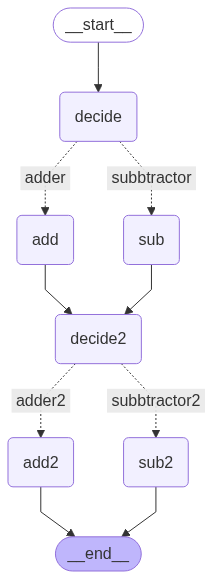

In [43]:
from IPython.display import display , Image
draw_mermaid_png = app.get_graph().draw_mermaid_png
display(Image(draw_mermaid_png())) #Display the graph as a mermaid diagram


In [44]:
initial_state_1 = AgentState(
    number1=10,
    number2=5,
    number3=3,
    number4=3,
    operation1='+',
    operation2='-') #another way to invoke the graph

print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'number3': 3, 'number4': 3, 'result': 15, 'result2': 0, 'operation1': '+', 'operation2': '-'}
